# Introduction

The purpose of this Project is to analyze data about diverse species observed in various national park areas. The data used for this project was obtained from the national park service and is *inspired* by genuine data but is primarily fictitious. 

This project will scope, analyse, prepare, plot data, and attempt to explain the conclusions of the analysis.

The project objective can be broken down into the following questions:

- What is the distribution of conservation status for species?
- Are particular sorts of species more likely to become endangered?
- Are differences in species conservation status relatively significant?
- Which animals are most common, and how are they distributed among parks?

**Data sources:**

'Observations.csv' and 'Species info.csv' - [Codecademy.com](https://www.codecademy.com).


# Scope

This project aims to help the national park services to prevent loss of biodiversity from various national parks. The loss of biodiversity impacts the whole eco system of the park as a whole since all life forms within the park depend on each other either directly or indirectly.

 The first section defines the project goals; this section will outline the high-level objectives and set the project's aims. The second section is the data; which is already provided in this project, but it still needs to be cleaned and tuned to meet the project goals. The third section includes the analysis, which includes the methodologies and questions that are linked with the project objectives. Finally, the evaluation will aid us in drawing conclusions to explain our findings from our analysis.

#### 1. Project Goals

The perspective of the this project will be through a biodiversity analyst for the National Parks Service. As analysts, we want to identify any at-risk and endangered species to ensure their survival, in order to maintain a high level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species, their conservations status, and their relationship to the rest of the national park's ecosystem. The project goals can be framed into the following questions:

- What is the distribution of conservation status for species?
- Identify types of species which are more likely to be endangered if any?
- Are the differences between species and their conservation status significant?
- Which animal species is the most common and what is their distribution amongst different national parks?

#### 2. Data

The first `csv` file has information about each species and the other has observations of species with respective park locations. 

#### 3. Analysis

To perform data analysis, descriptive statistics and data visualization techniques will be employed to understand the data. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

#### 4. Evaluation

Lastly, in this section we will revisit the goals and check if the output of the analysis can explain the questions we first set to answer. This section will also reflect on what has been learned through the process, and if any of the questions were left un-answered. This could also include limitations or if any of the analysis could have been done using different techniques.


# PROJECT CODE

### Step 1. Importing modules
We import the following modules to achieve the respective goals;

- PANDAS - We import pandas to create a csv reader object that can be used to extract the raw data from the provided data files.

 

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



### Step 2. Loading the Data
The given CSV data files include:

species_info.csv - contains data about different species and their conservation status
observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.
The datasets provided have the following columns of data:

species_info.csv:

- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status

observations.csv:

- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [2]:
species_data = pd.read_csv('species_info.csv')  # We utilise dataframe data structure to store extracted data
species_data.head()  # To peek the the extracted data

observation_data = pd.read_csv('observations.csv')
observation_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species_shape = species_data.shape  # To check the dimensions of the species data matrix
print('Species data dimensions are:', species_shape)
observation_shape = observation_data.shape  # To check the dimensions of the observed data matrix
print('Observed data dimensions are:', observation_shape)

Species data dimensions are: (5824, 4)
Observed data dimensions are: (23296, 3)


### Step 3. Exploring the Data
To calculate summary statistics for our data sets;
- We first need to extract the total number of species we are dealing with
- Next we need to know the distinct categories of species we have
- Then we can obtain the counts of species in each of the categories
- And finally we can obtain the number of conservation status categories and their counts respectively 

#### 3.1 Species count
To obtain this count, we can simply look for all the unique species names in the scientific_name column in the species_info.csv data file and count them up.

In [4]:
species_count = species_data.scientific_name.nunique()
print("The total number of unique species is: ", species_count)

The total number of unique species is:  5541


#### 3.2 Species categories count
To obtain this count, we can simply look for all the unique species category names in the category column in the species_info.csv data file and count them up.

In [5]:
species_categories_count = species_data.category.nunique()
print("The total number of unique species categories is: ", species_categories_count)

The total number of unique species categories is:  7


#### 3.3 Species count for each unique category
To obtain this count, we can simply group the data set by category and obtain the size of each data set.

In [6]:
grouped_categories = species_data.groupby("category").size()
print(grouped_categories)

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


#### 3.4 Conservation status category count & list
To obtain this count, we can simply look for all the unique conservation category names in the conservation_status column in the species_info.csv data file and count them up.

In [20]:
conservation_category_count = species_data.conservation_status.nunique()
conservation_categories = species_data.conservation_status.unique()

print("The total number of unique conservation category names is: ", conservation_category_count)
print("The unique conservation category names are: ")
for name in conservation_categories:
    print('\t- ' + str(name))

The total number of unique conservation category names is:  4
The unique conservation category names are: 
	- nan
	- Species of Concern
	- Endangered
	- Threatened
	- In Recovery


#### 3.5 Species count for each unique conservation status category
To obtain this count, we can simply group the data set by category and obtain the size of each data set.
- Note that here the 'nan' category just refers to the species that do not face any kind of endengerment

In [11]:
grouped_conservation_categories = species_data.groupby("conservation_status").size()
nan_category = species_data.conservation_status.isna().sum()
print(grouped_conservation_categories)
print("Nan : ", nan_category)

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
Nan :  5633


#### 3.6 Observations
Next we explore at our observations data. Firstly we want to know how many parks our data was collected from along with their names. We would also like to further determine the total amount of observations that were recorded within the 7 day study period.

In [17]:
number_parks = observation_data.park_name.nunique()
park_names = observation_data.park_name.unique()
total_observations = observation_data.observations.sum()

print("The total number of unique parks is: ", number_parks)
print("The unique park names are: ")
for park in park_names:
    print('\t- ' + park)
print("The total number of observations recorded is: ", total_observations)

The total number of unique parks is:  4
The unique park names are: 
	- Great Smoky Mountains National Park
	- Yosemite National Park
	- Bryce National Park
	- Yellowstone National Park
The total number of observations recorded is:  3314739


### Step 4. Analysis
In this section we will focus on analysing the data we explored in the above section. In order to do this, we first need to clean and tune our data. We can start with the conservation status column where we saw a lot of `Nan values` which we will now change to `No Intervention`. These are the categories of the conservation status:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In [21]:
species_data.fillna('No Intervention', inplace=True)
species_data.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next, we examine the many categories contained in the 'conservation status' column, except for those that do not need action. Here are the table and chart to investigate.

In [22]:
conservation_category = species_data[species_data.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


There were seven animals and four birds among those listed as 'Endangered'. There were three birds and one mammal in the 'In Recovery' category, which might indicate that the birds are recovering faster than the mammals.

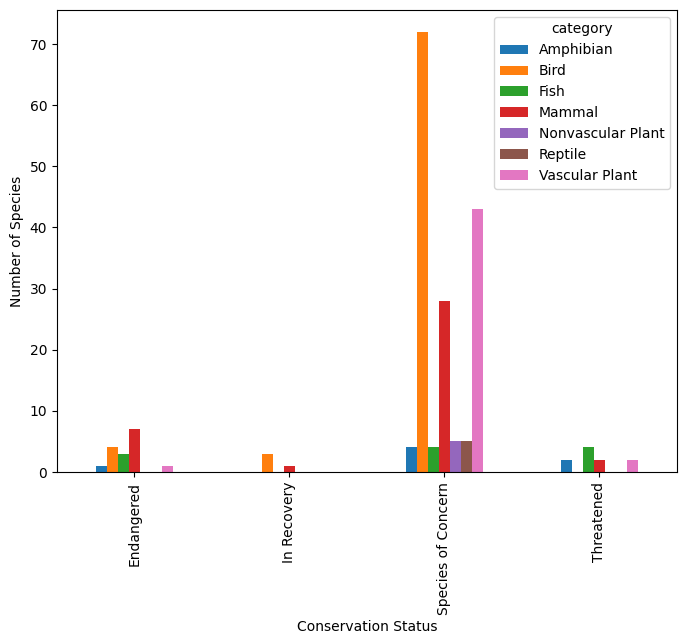

In [23]:
analysis_plot = conservation_category.plot(kind = 'bar', figsize=(8,6), 
                               stacked=False)
analysis_plot.set_xlabel("Conservation Status")
analysis_plot.set_ylabel("Number of Species");

#### 4.1 Species in conservation

The next question is whether particular species are more prone to become endangered. This may be addressed by adding a new column named 'is protected' and include any species with a value other than 'No Intervention'.

In [24]:
species_data['is_protected'] = species_data.conservation_status != 'No Intervention'

Now that we've generated the new column, we sort it by 'category' and 'is_protected' to see a breakdown of each species kind and protection status. It is clear that Birds, Vascular Plants, and Mammals have a greater absolute number of protected species. Absolute numbers are not usually the most helpful statistic; consequently, the rate of protection that each 'category' displays in the data must be calculated. According to this research, 17 percent of mammals and 15 percent of birds were under protection.

In [25]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [26]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### 4.2 Test Statistic

This section will use chi-squared tests to determine whether there are statistically significant differences in conservation status rates across various species. A contingency table must be established before running a chi squared test. Here is how the contingency table should look:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be labelled 'contingency1' and will require the right numbers for mammals and birds to be entered. The p-value value obtained from the chi-squared test is 0.69. To measure statistical significance, the usual p-value is 0.05. The result of 0.69 obtained from this test is significantly more than 0.05. Thus in the case of mammals and birds, there appears to be no substantial association between them, implying that the factors are independent!.

In [27]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In the next pair, we test the difference between `Reptile` and `Mammal`.

The format is as follows:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

Here the p-value is 0.039 which is below the standard threshold of 0.05 thus the difference between reptile and mammal may be statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [28]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

#### 4.2 The Different Types of Species in Different Parks

The data from conservationists who have been recording sightings of various species at many national parks for the previous 7 days will be used in the next round of analyses. The first step is to look at the common names from'species' to get a sense of which animals are most common in the dataset. The data will have to be separated into individual names.

In [29]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species_data[species_data.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to remove duplicate terms from each row, as they should only be counted once per species. The words must then be condensed into a single list for ease of usage. The data is now ready to count the number of instances of each term. According to this research, 'Bat' appeared 23 times, whereas 'Shrew' appeared 18 times.

In [30]:
clean_rows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)
    
clean_rows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [31]:
results = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
results[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [32]:
words_counted = []

for i in results:
    x = results.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
33,Bat,23
71,Shrew,18
178,Myotis,17
143,Mouse,16
189,Chipmunk,13
23,Squirrel,12
97,American,12
125,Eastern,11
42,Vole,11
128,Western,10


There are various distinct scientific names for different sorts of bats in the data. The next step is to determine which rows of'species' relate to bats. To determine whether 'is bat' is 'True,' a new column of boolean values can be added. Then we can obtain a subset of the data where `is_bat` is true, returning any rows that match. The data shows that there are a lot of species of bats and a mix of protected vs. non-protected species. 

In [34]:
species_data['is_bat'] = species_data.common_names.str.contains(r"\bBat\b", regex = True)

species_data.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [35]:
species_data[species_data.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next we merge the above results with `observations` to create a `DataFrame` with observations of bats across the four national parks. This will allow us to create a table of the total observations of bats made at each national park over the past 7 days.  

In [36]:
bat_observations = observation_data.merge(species_data[species_data.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [37]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's look at each park in terms of protected bats vs. non-protected bat sightings. Except for the Great Smoky Mountains National Park, it appears that every park has more sightings of protected bats than not. This might be interpreted positively for bats. The graphic below is the result of the most recent data alteration. This graphic shows that Yellowstone and Bryce National Parks appear to be doing well with their bat populations, since there are more sightings of protected bats than non-protected species. Since new non-protected species have been discovered, the Great Smoky Mountains National Park may need to step up conservation efforts.

In [39]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


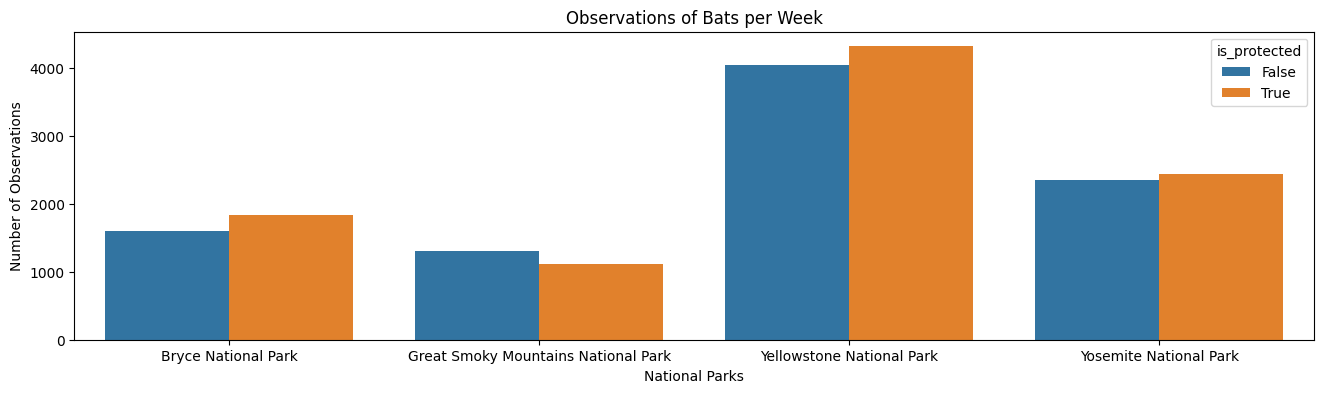

In [40]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

### Step 5. Conclusions

In this project, we were able to generate multiple data visualisations and conclusions regarding the diverse species found in four of the National Parks included in this data collection.

This initiative was also able to provide answers to some of the initial questions:

- What is the distribution of species conservation status?
    - The great majority of species were not protected.
    (5,633 vs 191)
- Are particular species more prone to become endangered?
    - Mammals and birds had the largest percentage of protected species.
- Is there a difference between species in terms of conservation status?
    - While there was no statistically significant difference in conservation percentage between mammals and birds, there was a statistically significant difference between mammals and reptiles.
- What are the most common animals, and how are they distributed?
    - The study discovered that bats appeared the most frequently and were most likely to be found at Yellowstone National Park.

### Step 6. Future Research

This dataset only comprised observations from the last 7 days, making it impossible to assess changes over time. It would be interesting to watch how the conservation status of different species evolves through time. Another missing aspect is the area of each park; it may be inferred that Yellowstone National Park is significantly larger than the other parks, implying that it will have more observations and more biodiversity. Finally, if exact locations were recorded, the species' geographical distribution may be studied and tested to see if these findings are spatially clustered.